# EXPLORATORY DATA ANALYSIS 
# (ANALISIS EXPLORATORIO DE DATOS)

This document has a simple exploratory analysis, it is about visualizing what type of information the dataset has, how some variables behave, what magnitudes and units are handled and very superficial things.

## Data House Prices

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## EXPLORATORY DATA ANALYSIS

## Data

Import data from the downloaded CSV file. There is also the option to import it from a direct link, depending on the source.

In [126]:
#    Dowload DataSet:
#  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv
df_train = pd.read_csv('data_csv/train.csv')

## Show DF dimensions

In [97]:
df_train.shape

(1460, 81)

## Show a general description of a DF

In [98]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Starting from a hypothesis, the following can be analyzed:

CONSTRUCTION VARIABLES:
- OverallQual
- YearBuilt

Space variables:
- LotArea
- GrLivArea

## Now a general description

In [99]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Analyze data distribution graphics

Since a non-normal distribution of the data is observed, the Kurtosis and skew indices can be calculated to check for deviations.

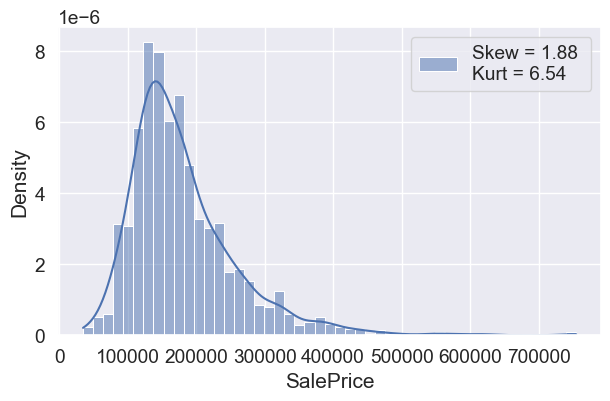

In [100]:
skew_price = df_train['SalePrice'].skew()
kurt_price = df_train['SalePrice'].kurt()

fig, ax = plt.subplots(figsize=(7,4))
sns.histplot(df_train['SalePrice'],
             label=f"Skew = {skew_price:.2f} \nKurt = {kurt_price:.2f}", 
             stat="density",
             kde=True)
ax.legend()


## Review the aforementioned variables and their relationship to price

### Constraint Variables

Proceed with creating an auxiliary table that is a segmentation of the original dataset.

In [101]:
var = "GrLivArea"
varpivot = "SalePrice"
data = pd.concat([df_train[varpivot],df_train[var]],axis=1)
data.head(10)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
5,143000,1362
6,307000,1694
7,200000,2090
8,129900,1774
9,118000,1077


In [102]:
data.describe()

,SalePrice,GrLivArea
count,1460.000000,1460.000000
mean,180921.195890,1515.463699
std,79442.502883,525.480383
min,34900.000000,334.000000
25%,129975.000000,1129.500000
50%,163000.000000,1464.000000
75%,214000.000000,1776.750000
max,755000.000000,5642.000000


### A dispersion graph is performed

In this way the behavior of the two variables and possible trends can be visualized

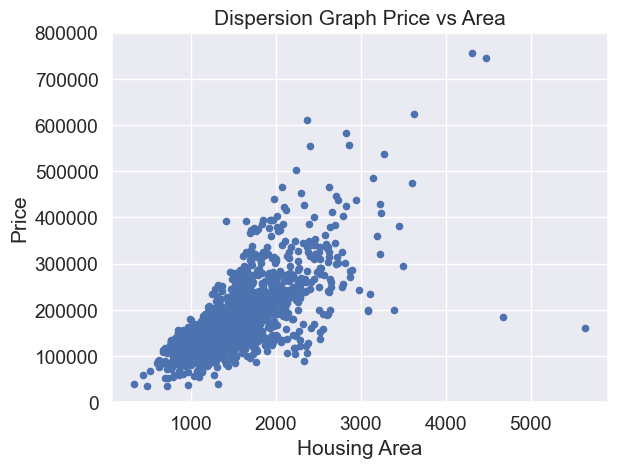

In [103]:
data.plot.scatter(x=var, 
                  y=varpivot,
                  ylim=(0,800000),
                  xlabel="Housing Area", 
                  ylabel="Price",
                  title = "Dispersion Graph Price vs Area")
plt.show()

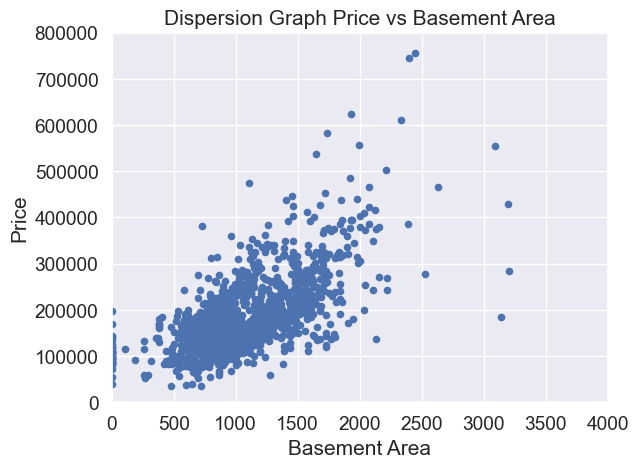

In [104]:
var = "TotalBsmtSF"
varpivot = "SalePrice"
data = pd.concat([df_train[varpivot],df_train[var]],axis=1)
data.plot.scatter(x=var, 
                  y=varpivot,
                  ylim=(0,800000),
                  xlim=(0,4000),
                  xlabel="Basement Area", 
                  ylabel="Price",
                  title = "Dispersion Graph Price vs Basement Area")
plt.show()

### Categorical Variables (Not Numerical)

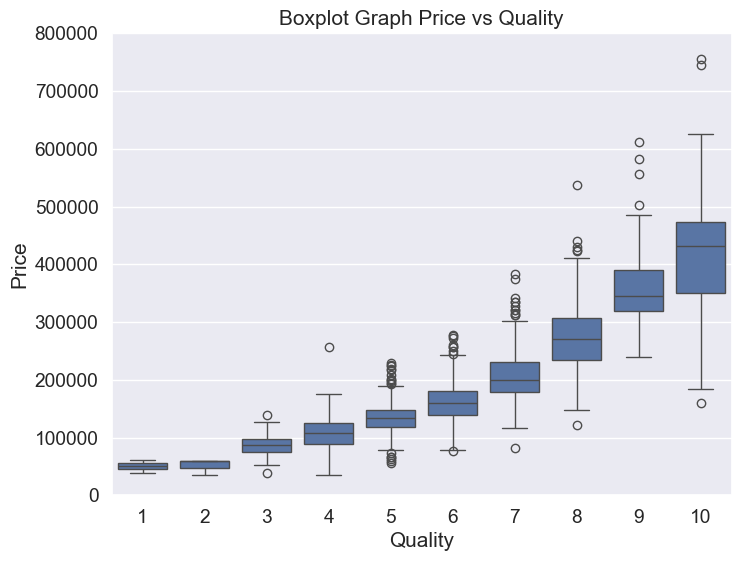

In [105]:
var = "OverallQual"
varpivot = "SalePrice"
data = pd.concat([df_train[varpivot],df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y=varpivot,data=data)
fig.axis(ymin=0,ymax=800000)
plt.title("Boxplot Graph Price vs Quality")
plt.xlabel("Quality")
plt.ylabel("Price")
plt.show()

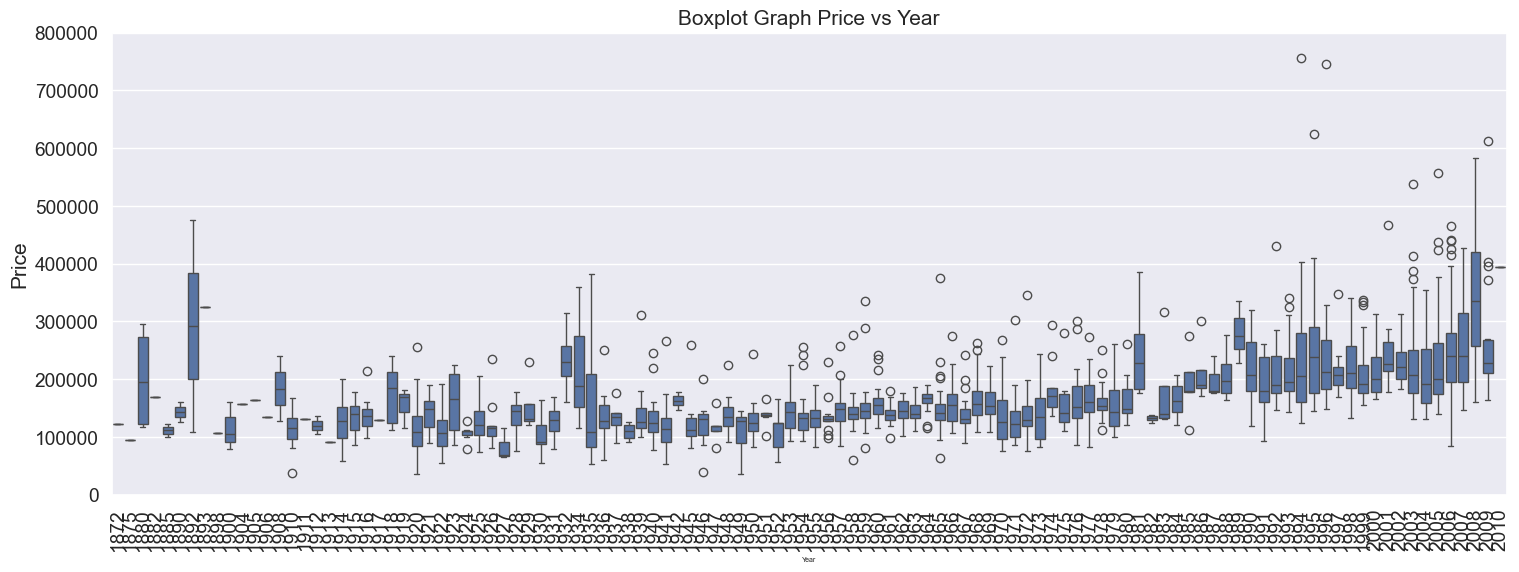

In [106]:
var = "YearBuilt"
varpivot = "SalePrice"
data = pd.concat([df_train[varpivot],df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var,y=varpivot,data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)
plt.title("Boxplot Graph Price vs Year")
plt.xlabel("Year", fontsize=5)
plt.ylabel("Price")
plt.show()

# Linear Correlation Analysis

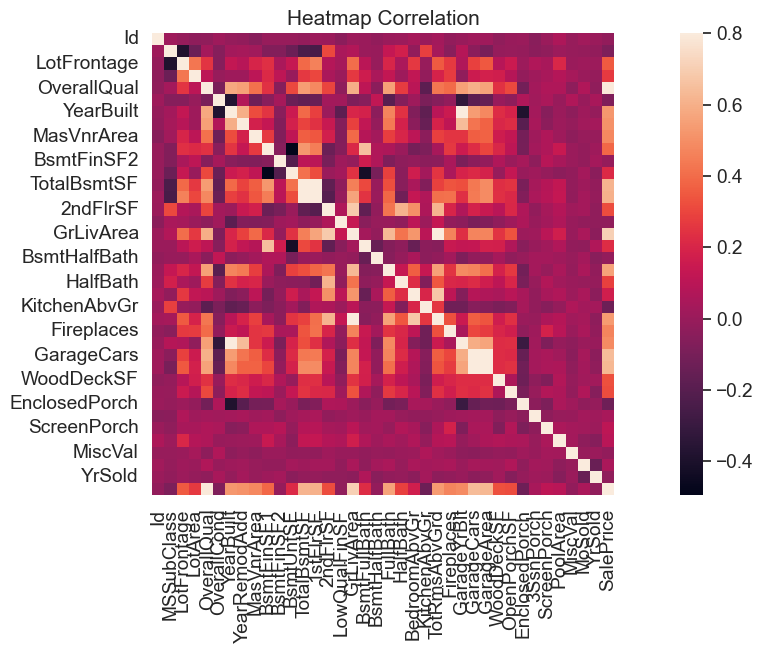

In [107]:
corrmat = df_train.select_dtypes(include=['number']).corr()

f, ax = plt.subplots(figsize=(17, 6))
f = sns.heatmap(corrmat,
                vmax = 0.8,square = True)

plt.title("Heatmap Correlation")
plt.show()

## The most influential variables are chosen

In [108]:
k=10
corrs = corrmat.nlargest(k,"SalePrice")["SalePrice"].index
print(corrs)
cm = np.corrcoef(df_train[corrs].values.T)
print(cm)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
[[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055
  0.60585218 0.56066376 0.53372316 0.52289733]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176 0.5378085
  0.47622383 0.55059971 0.42745234 0.57232277]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748 0.4548682
  0.56602397 0.63001165 0.82548937 0.19900971]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541 0.43458483
  0.43931681 0.46967204 0.36228857 0.53785009]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.         0.48666546
  0.48978165 0.40565621 0.33782212 0.47895382]
 [0.61358055 0.5378085  0.4548682  0.43458483 0.48666546 1.
  0.81952998 0.32372241 0.28557256 0.391452  ]
 [0.60585218 0.47622383 0.56602397 0.43931681 0.48978165 0.81952998
  1.         0.38063749 0.40951598 0.28198586]
 [0.56066376 0.55059971 0.63001

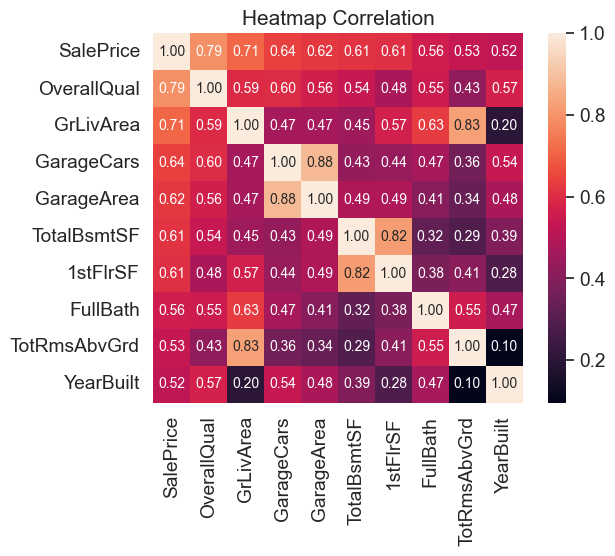

In [109]:
sns.set_theme(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,
                 annot=True,
                 square=True,
                 fmt=".2f",
                 annot_kws={"size":10,},
                 yticklabels=corrs.values,
                 xticklabels=corrs.values)

plt.title("Heatmap Correlation")
plt.show()

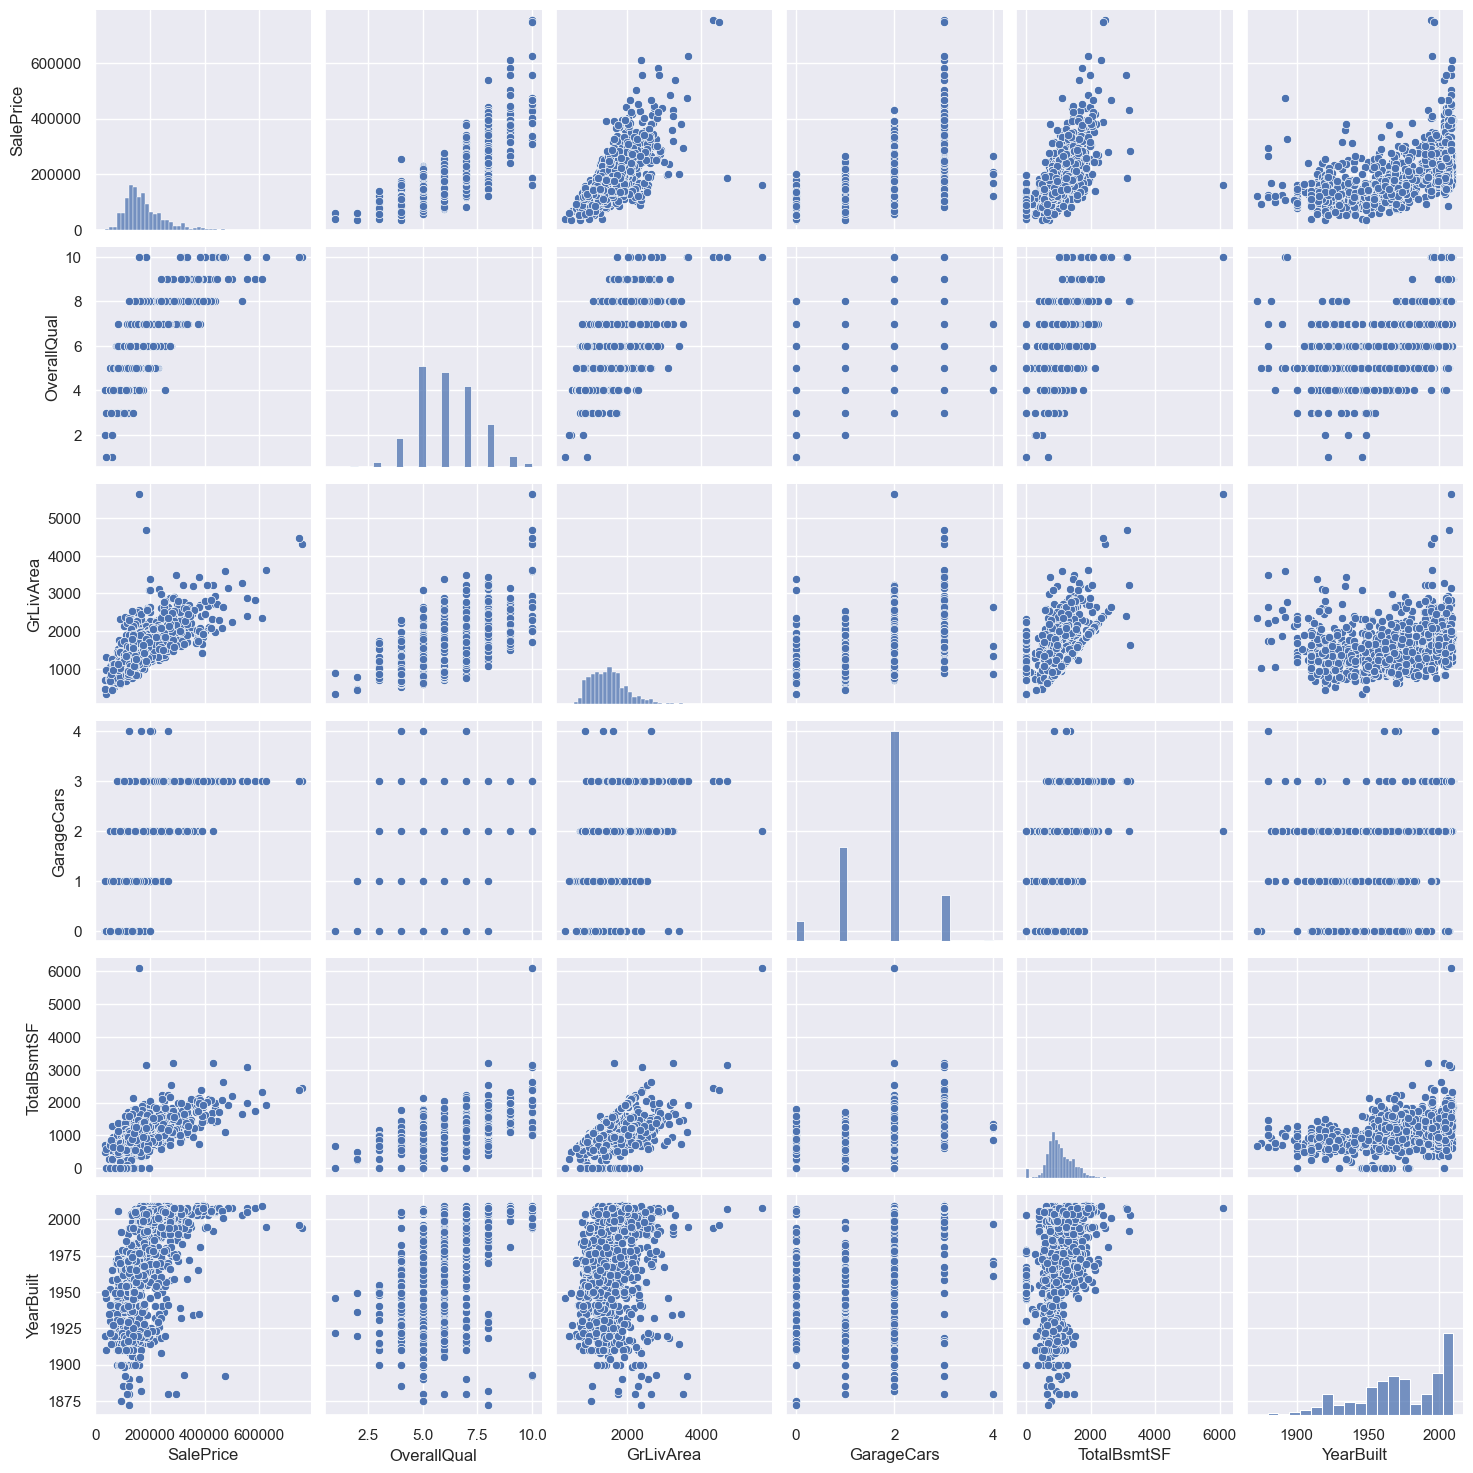

In [ ]:
sns.set_theme()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt']
sns.pairplot(df_train[cols],height=2.5,palette=)
plt.show()

## Linear regression with standardized coefficients
The standardized coefficients (also called beta) allow to compare the relative impact of the independent variables in the dependent variable, eliminating the differences of scale

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Input variables
X = df_train[["OverallQual",'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt']]
y = df_train["SalePrice"]

# DF division in part of training (80%) and part of the test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensional climbing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multivariate Linear Regression Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

## Linear regression results (Test vs Prediction)

In [112]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel evaluation:")
print(f"MAE :  {mae:.2f}")
print(f"RMSE:  {rmse:.2f}")
print(f"R²  :  {r2:.3f}")


Model evaluation:
MAE :  25414.73
RMSE:  39763.30
R²  :  0.794


### Calculation of standardized coefficients

standardized coefficients:
OverallQual    27877.252075
GrLivArea      25586.494991
GarageCars     11204.379605
TotalBsmtSF    11173.109461
YearBuilt       9686.955569
dtype: float64


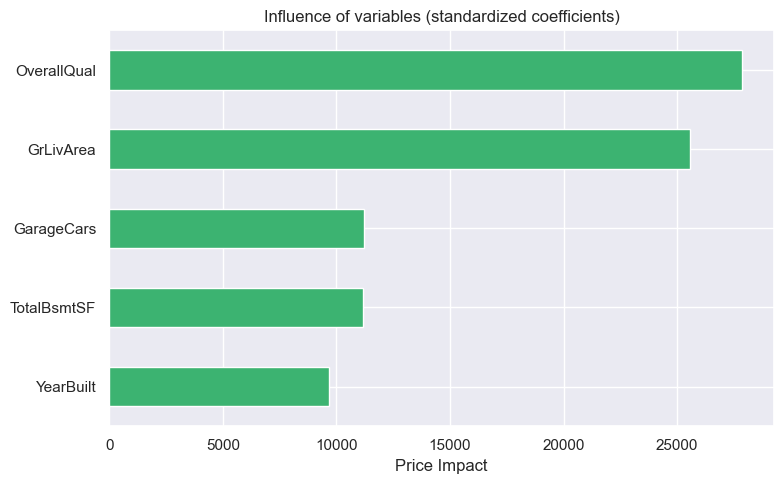

In [120]:
coef_impact = pd.Series(model.coef_, index=X.columns)
print("standardized coefficients:")
print(coef_impact.sort_values(ascending=False))

# Variable graph (coefficients)
plt.figure(figsize=(8, 5))
coef_impact.sort_values().plot(kind='barh', color='MediumSeaGreen')
plt.title("Influence of variables (standardized coefficients)")
plt.xlabel("Price Impact")
plt.tight_layout()
plt.show()

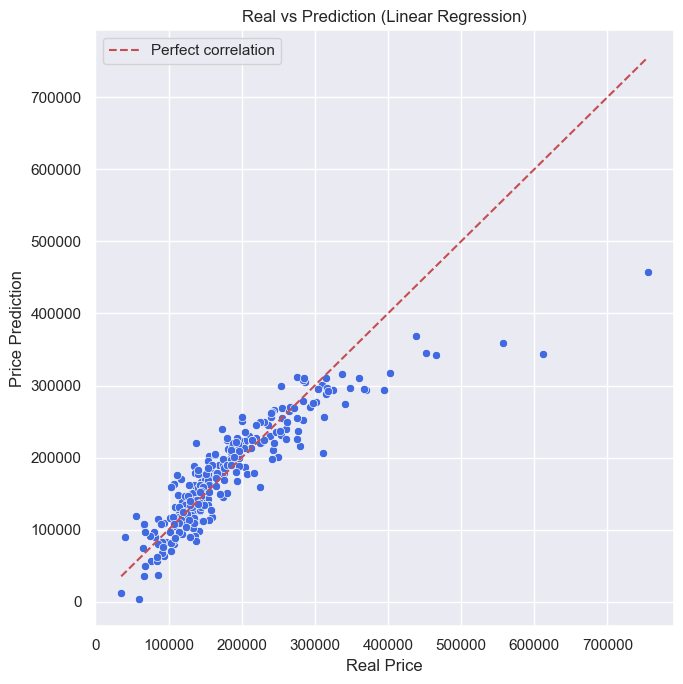

In [114]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, 
                y=y_pred, 
                color="royalblue")

plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         '--r', 
         label='Perfect correlation')
plt.xlabel("Real Price")
plt.ylabel("Price Prediction")
plt.title("Real vs Prediction (Linear Regression)")
plt.legend()
plt.tight_layout()
plt.show()

### Residuals Distribution

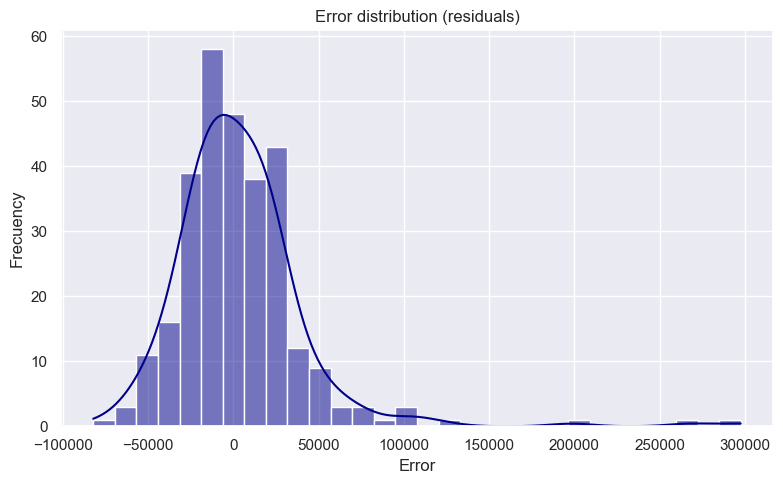

In [121]:
resid = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(resid, bins=30, kde=True, color='darkblue')
plt.title("Error distribution (residuals)")
plt.xlabel("Error")
plt.ylabel("Frecuency")
plt.tight_layout()
plt.show()